In [1]:
from astropy.nddata import Cutout2D
from astropy import coordinates
from astropy import units as u

#easiest option is using a library...assuming it works...it doesn't?
# from statsmodels.distributions.empirical_distribution import ECDF

def edf_calc(data):
    #following: https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)



#easier than below: follows https://stackoverflow.com/questions/3209362/how-to-plot-empirical-cdf-in-matplotlib-in-python
#     x = np.sort(data)
#     y = np.arange(len(x))/float(len(x))
    
    
#before: following https://stackoverflow.com/questions/17821458/random-number-from-histogram to produce random numbers from an original histogram
#     #Defining the histogram and midpoints of each bin
#     hist = theory[:, 2]
#     bin_midpoints = (theory[:,1] + theory[:,0])/2.

#     #producing a CDF, which can be used to draw numbers from (which can't be intuitively done directly from a histogram)
#     cdf = np.cumsum(hist)
#     cdf = cdf / cdf[-1]

#     #generating random values, which are in turn used to take random values at a certain position in the cdf list...which are then used to pick values from the bin_midpoints (the actual possible x values)
#     values = np.random.rand(N)  	#this returns dimensions (m, n) for the array...or a single list as is here
#     value_bins = np.searchsorted(cdf, values)
#     random_from_cdf = bin_midpoints[value_bins]

#     return edf

# This dictionary defines the colormap
cdict = {'red':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
import matplotlib.colors as colors
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)


import matplotlib.pyplot as plt
def implot(data, w, wcscond, vmax_p):
    fig = plt.figure()
    
    if  wcscond == True:
        fig.add_subplot(111, projection=w)
    else:
        fig.add_subplot(111)
    
    #for christmas turn on GnRd
    #plt.cm.get_cmap('Blues', 6) is another option
    #can also use RdBu...
    #otherwise just use plt.cm.viridis b/c it works
    plt.imshow(data, origin='lower', cmap=plt.cm.viridis, vmin =0, vmax=vmax_p)
    plt.xlabel('RA')
    plt.ylabel('Dec')

['./hh_div\\regrid_hh13_noleakage_ston_0.2.fits', './hh_div\\regrid_hh15_noleakage_ston_0.2.fits', './hh_div\\regrid_hh341_noleakage_ston_0.2.fits', './hh_div\\regrid_hh5_noleakage_ston_0.2.fits']


SystemExit: 

C:\Users\Adam2\Anaconda\envs\mypython3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


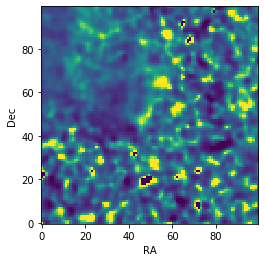

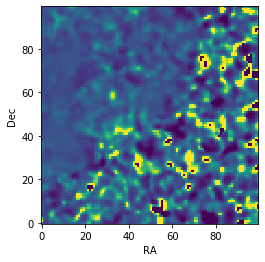

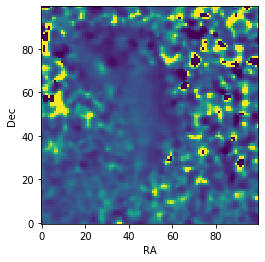

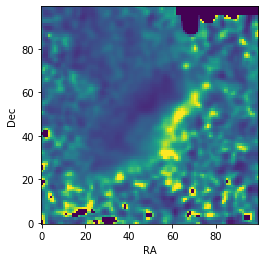

In [3]:
#trying to find cutout for each knot...
#only saving the fits files

#handling image ^@^@^@^@data
import sys
import numpy as np
from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D

# file = '../../Convolved_Images_Hub/conv_126_image.fits'
# file = 'regrid_hub_dash_noleakage_ston_0.8.fits'
import glob
# filenames = glob.glob('./hh_cutouts/*126*')
filenames = glob.glob('./hh_div/*')
print(filenames)



#initial guesses for cutout coords of scattered light
# #guesses for cutout coords of knots HH 7 - 11
# coords_list = [[(550, 170), (100, 200)], 
#               [(600, 340), (120, 70)],
#               [(460, 395), (60, 60)],
#               [(540, 480), (90, 140)],
#               [(530, 570), (90, 90)]
#               ]

# for i in range(len(coords_list)):
#     #unpacking coords
#     position = coords_list[i][0]
#     size = coords_list[i][1]
               
#     #cutting out coordinates
#     cutout = Cutout2D(data, position, size, wcs = w)
#     datacut = cutout.data
#     wcscut = cutout.wcs

#     #plotting image
#     implot(datacut, wcscut, False, 1) 
#     plt.savefig('knot_HH'+str(i+6))


coords_list = [[(140, 60), (80 - 40, 80 - 40)],
              [(190, 75), (80 - -50, 80 - -50)],
              [(155, 142), (80 - 60, 80 - 70)],
              [(115, 100), (80 - 30, 80 - 30)]
              ]

coords_list = [[(140, 60), (100, 100)],
              [(190, 75), (100, 100)],
              [(155, 142), (100, 100)],
              [(115, 100), (100, 100)]
              ]

for file, coords in zip(filenames, coords_list):
    hdu1 = fits.open(file)  #import image
    w = wcs.WCS(hdu1[0].header)   #get wcs coords
    data = hdu1[0].data
    hdu1.close()
                        
    #     #unpacking coords
    position = coords[0]
    size = coords[1]
               
    #cutting out coordinates
    cutout = Cutout2D(data, position, size, wcs = w)
    datacut = cutout.data
    wcscut = cutout.wcs

    #plotting
    implot(datacut, w, False, 3)  
    plt.savefig('cutout_jpgs/'+file.split('\\')[1].split('.')[0])
    #     sys.exit()

    
sys.exit()



knee:  2.9385841164388222
count:  8119.0
0:  [7838]
0:  5.714485043674959
knee:  2.8836382455016607
count:  8128.0
0:  [7762]
0:  5.639874769909272
knee:  3.029026608044293
count:  7687.0
0:  [7574]
0:  8.23853636294484
knee:  1.643272321973172
count:  8200.0
0:  [8141]
0:  3.8848940398196192


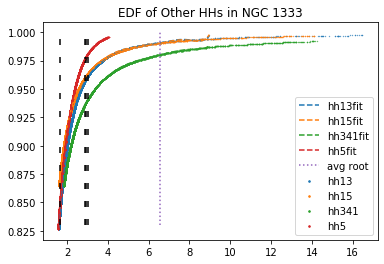

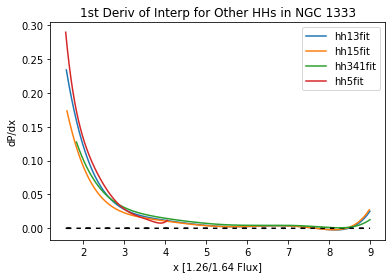

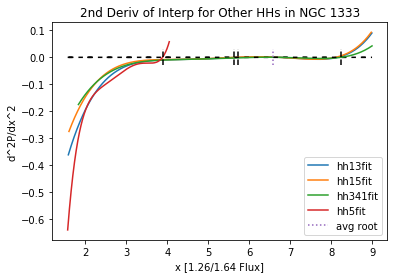

In [27]:
#trying to find cutout for each knot...
#only saving the fits files

#handling image ^@^@^@^@data
from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D
from kneed import KneeLocator
import numpy as np
import pandas as pd
import sys
from scipy.interpolate import UnivariateSpline

import glob
filenames = glob.glob('./hh_div/*')
# print(filenames)
# file = 'regrid_hub_dash_noleakage_ston_0.8.fits'

#formatting figures
plt.figure(111)
plt.title('EDF of Other HHs in NGC 1333')
# plt.xlim(0.5,3.5)
# plt.ylim(0,1.1)

plt.figure(112)
plt.title('1st Deriv of Interp for Other HHs in NGC 1333')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('dP/dx')
# plt.xlim(0.5,3.5)


plt.figure(113)
plt.title('2nd Deriv of Interp for Other HHs in NGC 1333')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('d^2P/dx^2')
# plt.xlim(0.5,3.5)


count = 0
for file in filenames:
    
    hdu1 = fits.open(file)  #import image
    w = wcs.WCS(hdu1[0].header)   #get wcs coords
    data = hdu1[0].data
    hdu1.close()

#     flatting data and plotting EDF
    flat_data = data.flatten()
    xedf, yedf = edf_calc(flat_data)
    a0 = int(4e4)
    af = int(6.4e4)
    if count == 2:
        a0 = int(5.4e4)
        af = int(6.2e4)
    elif count == 0:
        af = int(4.827e4)
    elif count == 1:
        a0 = int(5.4e4)
        af = int(6.23e4)
    elif count == 3:
        af = int(4.82e4)
    
    plt.figure(111)
    plt.scatter(xedf[a0:af], yedf[a0:af], label = file.split("_")[2], s = 0.1)
    
    
    #trying kneed - elbow point finder package
    kn = KneeLocator(xedf[a0:af], yedf[a0:af], curve='concave', direction='increasing')
    print('knee: ', kn.knee)
    
    
    #producing smaller list of values that can be fit with a function
    arr = np.array([xedf[a0:af], yedf[a0:af]])
    arrx_uni = np.unique(arr, axis=1)
    arr_nodup = np.unique(arrx_uni, axis=1)
    
    arrx_lim = np.array([i for i in arr_nodup[0] if i < 9.0])
    arry_lim = arr_nodup[1][:len(arrx_lim)]
    
    #creating smooth curve
    dim = 7
    pfit = np.polyfit(arrx_lim, arry_lim, dim)
    f = np.poly1d(pfit)
    plt.plot(arrx_lim, f(arrx_lim), linestyle='--', label=file.split("_")[2]+'fit')
    plt.plot([kn.knee, kn.knee], [0.83,1], color='black', linestyle='--', dashes=(4, 8))

    
    #plotting derivative to find turning point...
    plt.figure(112)
    deriv_f = np.polyder(f)
    plt.plot(arrx_lim, deriv_f(arrx_lim), label=file.split("_")[2]+'fit')
    plt.plot(arrx_lim, [0]*arrx_lim, color = 'black', linestyle='--', dashes=(3, 10))
    
    plt.figure(113)
    deriv2_f = np.polyder(deriv_f)
    plt.plot(arrx_lim, deriv2_f(arrx_lim), label=file.split("_")[2]+'fit')
    plt.plot(arrx_lim, [0]*arrx_lim, color = 'black', linestyle='--', dashes=(3, 10))
    
    count += 1
#     sys.exit()

        #finding min values of derivs...figuring out where 0 reddening ratio is
#     setted_list = deriv_f(arrx_lim)
    setted_list = deriv2_f(arrx_lim)
    minimum = float("inf")

    value_chosen = 0.
    count2 = 0.
    for val in setted_list:
        count2 += 1
        if abs(val - value_chosen) < minimum:
            final_value = val
            minimum = abs(val - value_chosen)
    
    print('count: ', count2)
    print('0: ', [np.where(setted_list == final_value)[0][0]])
    print('0: ', arrx_lim[np.where(setted_list == final_value)[0][0]])
    
    avg = arrx_lim[np.where(setted_list == final_value)[0][0]]
    plt.plot([avg, avg], [-0.03, 0.03], color='black', linestyle='--')

    
#defining legends
plt.figure(111)
plt.plot([6.58, 6.58], [0.83,1], label ='avg root', linestyle=':')
plt.legend(loc='best', markerscale = 5)
plt.savefig('../EDFs/ngc1333otherEDF.png')

plt.figure(112)
plt.legend(loc='best', markerscale = 5)
plt.savefig('../EDFs/ngc1333otherderiv.png')

plt.figure(113)
plt.plot([6.58, 6.58], [-0.03, 0.03], label ='avg root', linestyle=':')
plt.legend(loc='best', markerscale = 5)
plt.savefig('../EDFs/ngc1333otherderiv2.png')



  



#initial guesses for cutout coords of scattered light

# coords_list = [[(90, 700), (85, 130)], 
#               [(580, 645), (40, 80)],
#               [(480, 600), (30, 100)],
#               [(730, 550), (160, 160)],
#               [(420, 500), (180, 80)],
#               [(665, 420), (100, 100)],
#               ]

# #guesses for cutout coords of knots HH 7 - 11
# coords_list = [[(550, 170), (100, 200)], 
#               [(600, 340), (120, 70)],
#               [(460, 395), (60, 60)],
#               [(540, 480), (90, 140)],
#               [(530, 570), (90, 90)]
#               ]


# for i in range(len(coords_list)):
#     #unpacking coords
#     position = coords_list[i][0]
#     size = coords_list[i][1]
               
#     #cutting out coordinates
#     cutout = Cutout2D(data, position, size, wcs = w)
#     datacut = cutout.data
#     wcscut = cutout.wcs
    
# #     flatting data and plotting EDF
#     flat_data = datacut.flatten()
#     xedf, yedf = edf_calc(flat_data)
#     plt.scatter(xedf, yedf, label = str(i+7), s = 1)

# # plt.title('EDF of HH 7-11 Scattered Light Regions')
# plt.title('EDF of HH 7-11 Knots')
# plt.xlabel('x [1.26/1.64 Flux]')
# plt.ylabel('Cumulative Probability')
# plt.legend(loc='best', markerscale = 5)

# sys.exit()



['hh_div\\regrid_hh13_noleakage_ston_0.2.fits', 'hh_div\\regrid_hh15_noleakage_ston_0.2.fits', 'hh_div\\regrid_hh341_noleakage_ston_0.2.fits', 'hh_div\\regrid_hh5_noleakage_ston_0.2.fits']


SystemExit: 

C:\Users\Adam2\Anaconda\envs\mypython3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 432x288 with 0 Axes>

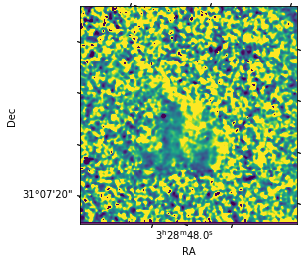

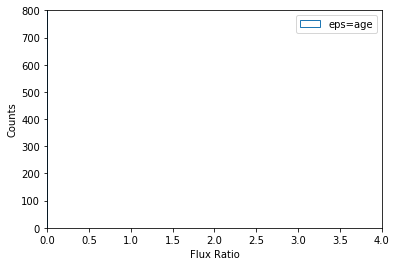

In [28]:
import glob
filenames = glob.glob('hh_div/*.fits')
print(filenames)

#handling image ^@^@^@^@data
import sys

from astropy.io import fits
from astropy import wcs


#HH7 region...mylat and mylon are center coords of a rectangular region, xsize and ysize are the width and length
# mylat = '3h29m08.423s'
# mylon = '+31d15m28.34s'
# xsize  = 95.9
# ysize = 44.753333


for file in filenames:
    hdu1 = fits.open(file)  #import image
    w = wcs.WCS(hdu1[0].header)   #get wcs coords
    data = hdu1[0].data    #grab data
    hdu1.close()
    
    plt.figure(111)
    implot(data, w, True, np.mean(data))     #plot

    
    plt.figure(222)
#     datacut, wcut  = imcrop(mylon, mylat, xsize, ysize, data, w)
#     implot(data[120:170, 500:610], w)  #plotting to confirm
    datacut = data.flatten()  #couldn't get cutout2d working...narrowed in on pixels by hand...should be the same regardless, though

    plt.hist(datacut, bins=40, histtype='step', label='eps='+file[-17:-14])
    plt.legend()
    plt.xlim(0, 4)
    plt.ylim(0, 800)
    plt.xlabel('Flux Ratio')
    plt.ylabel('Counts')

    sys.exit()


#     plt.savefig('datacut.png')
#     sys.exit()
